Author: Caleb Lyon

Purpose: Implement genetic algorithm in Scala to find solution to $x_1 + x_2 + x_3 + x_4 = y$
    for a given $y$ and analyze runtimes for different $y$ values.

In [1]:
import random
import math
import time
from matplotlib import pyplot as plt

In [2]:
# Some helpful functions

# Takes a list of 4 bits and converts to a decimal integer
def lst_to_dec(lst):
    if len(lst) != 4:
        return -1 # If the input list is not the right length return -1 to indicate error
    else:
        sum = 0
        for i in range(4):
            sum += lst[i] * 2**(3-i)  # Converting to decimal by adding the appropriate power of two multiplied by the bit
        return sum


# Computes the fitness score of a solution (List of 16 bits) for a given y (decimal integer)
def fit(y, sol):
    xs = [sol[0:4], sol[4:8], sol[8:12], sol[12:16]]
    sum = 0
    for x in xs: 
        sum += lst_to_dec(x)
    return abs(y - sum)  # The difference between the target value and the sum of the four binary values gives the solutions fitness


# Takes a list of 16 bits and probability of mutating and returns such an list having applied mutation
# Does not modify original list
def mutate(lst, p):
    new_list = []
    for bit in lst:  # Traverse entire solution and for each:
        if random.uniform(0,1) < p:  # Flip bit with probability p
            if bit == 0:
                new_list.append(1)
            else:
                new_list.append(0)
        else:
            new_list.append(bit)  # Always appending to new list so original isn't modified
    return new_list


# Takes two lists of 16 bits and returns resulting lists having applied crossover
# Does not modify original list
def crossover(l1, l2):
    i = random.randint(0, 15)  # Generates a random index at which to swap parent solutions
    new1 = l1[:i] + l2[i:]  # One new solution is the first segment of the first parent and second segment of second parent 
    new2 = l2[:i] + l1[i:]  # Second new solution is the first segment of second parent and second segment of first parent
    return new1, new2


We use the above functions to define a function genetic_algorithm, which actually runs the algorithm. 

Inputs:
    - y: Target integer between 0 and 60
    - init_sols: A first generation of solutions
    - mutate_prob: The probability with which we mutate when applying mutation function
Output:
    - Final generation of solutions

In [3]:
def genetic_algorithm(y, init_sols, mutate_prob):
    sols = init_sols
    found_sol = False
    while found_sol != True:
        # sols_with_fit is a list of tuples, where the first elem of the tuple is a solution 
        # and the second elem is its fitness score
        sols_with_fit = []
        for elem in sols:
            sols_with_fit.append((elem, (fit(y, elem))))
            
        sols_with_fit.sort(key = lambda x: x[1]) # Sorts solutions in order of increasing fitness scores (low fitness = better)

        # top_ten is a list of the top ten solutions without their fitness scores
        top_ten = [t[0] for t in sols_with_fit][0:10]
 
        # Generating new solutions by applying mutation to 6 best of top_ten and crossover to other 4
        # Since mutation typically makes less significant changes this is why mutation is applied to the better scores
        sols = top_ten
        for sol in top_ten[0:6]:
            sols.append(mutate(sol, mutate_prob))
        n1, n2 = crossover(top_ten[6], top_ten[7])
        n3, n4 = crossover(top_ten[8], top_ten[9])
        sols = sols + [n1, n2, n3, n4]
    
        # Check to see if we have found a solution
        for sol in sols[10:19]: #top_ten were already checked for solutions in the previous iteration => only look at second half
            if fit(y, sol) == 0:
                found_sol = True
                sols.remove(sol)  # Moves solution to front of list for convenience
                sols.insert(0, sol)  # We still return all solutions, although some are not true solutions, but at least one is
            
    return sols

In [4]:
# Testing genetic_algorithm function

# Generating intial population of 20 random sols
init_sols = [[random.randint(0,1) for i in range(16)] for j in range(20)]

print("Running this genetic algorithm on y=5 with mutation probability 0.1 gives the solutions: ")
count = 0
for elem in genetic_algorithm(5, init_sols, 0.1): # Each element is a potential solution, the first is definitely a solution
    x1, x2, x3, x4 = lst_to_dec(elem[:4]), lst_to_dec(elem[4:8]), lst_to_dec(elem[8:12]), lst_to_dec(elem[12:16])
    count += 1
    print(str(count) + ": " + str(elem[:4]) + ", " + str(elem[4:8]) + ", " + str(elem[8:12]) + ", " + str(elem[12:])
         + " (" + str(x1) + " + " + str(x2) + " + " + str(x3) + " + " + str(x4) + " = " + str(x1 + x2 + x3 + x4) + ")")

Running this genetic algorithm on y=5 with mutation probability 0.1 gives the solutions: 
1: [0, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1] (4 + 0 + 0 + 1 = 5)
2: [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1] (2 + 0 + 0 + 1 = 3)
3: [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 1], [0, 1, 1, 1] (1 + 0 + 1 + 7 = 9)
4: [1, 0, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1] (11 + 0 + 0 + 1 = 12)
5: [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 1] (2 + 8 + 0 + 3 = 13)
6: [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 0, 1], [0, 1, 1, 1] (1 + 4 + 1 + 7 = 13)
7: [1, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 1] (10 + 0 + 0 + 3 = 13)
8: [1, 0, 1, 0], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1] (10 + 0 + 4 + 1 = 15)
9: [1, 0, 1, 1], [0, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1] (11 + 0 + 4 + 1 = 16)
10: [1, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 1, 0] (10 + 1 + 1 + 6 = 18)
11: [1, 0, 1, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 1, 0] (11 + 1 + 0 + 6 = 18)
12: [0, 0, 1, 1], [0, 0, 0, 0], [0, 

Text(0, 0.5, 'Average Runtime')

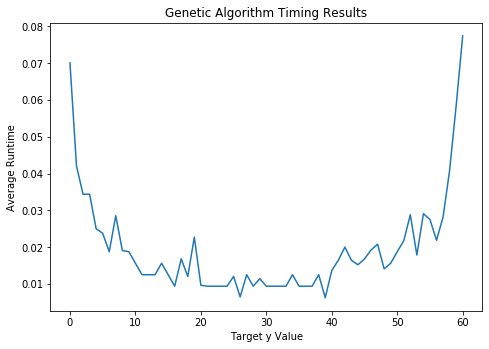

In [5]:
# Timing Analysis
ts = []
for y in range(61):
    sum = 0
    for i in range(20): # For more accurate analysis algorithm is run several (20 right now) times and resulting time is averaged
        start_time = time.time()
        init_sols = [[random.randint(0,1) for i in range(16)] for j in range(20)]  # Generates 20 random solutions
        genetic_algorithm(y, init_sols, 0.1)  # Apply genetic algorithm function to find solution
        elapsed_time = time.time() - start_time
        sum += elapsed_time
    avg_time = sum / 5
    ts.append(avg_time)
    

#Plotted Results
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(range(61), ts)
ax.set_title("Genetic Algorithm Timing Results")
ax.set_xlabel("Target y Value")
ax.set_ylabel("Average Runtime")


Note that the average runtime is greater for target $y$ values near the bottom or top of our range, as there are less possible
solutions, so these typically take longer to reach.

In [6]:
#Printed Results
print("y","Average Time")
for i in range(61):
    print(i, ",", ts[i])

y Average Time
0 , 0.07008838653564453
1 , 0.04203066825866699
2 , 0.03437619209289551
3 , 0.03437838554382324
4 , 0.025000476837158205
5 , 0.023763370513916016
6 , 0.01875166893005371
7 , 0.028537654876708986
8 , 0.019086933135986327
9 , 0.018751192092895507
10 , 0.015625715255737305
11 , 0.012500667572021484
12 , 0.012501335144042969
13 , 0.012500381469726563
14 , 0.01562657356262207
15 , 0.012500762939453125
16 , 0.00937509536743164
17 , 0.01682443618774414
18 , 0.0120025634765625
19 , 0.022710704803466798
20 , 0.009636497497558594
21 , 0.009375762939453126
22 , 0.009375858306884765
23 , 0.009375047683715821
24 , 0.009375715255737304
25 , 0.012041568756103516
26 , 0.0064548015594482425
27 , 0.012500953674316407
28 , 0.009374856948852539
29 , 0.011409854888916016
30 , 0.00937480926513672
31 , 0.009375810623168945
32 , 0.009376144409179688
33 , 0.009375667572021485
34 , 0.012500429153442382
35 , 0.009375333786010742
36 , 0.009376096725463866
37 , 0.009375286102294923
38 , 0.0125018119